# Analysis of the Titanic dataset

First we import all necessary Python libraries and then load the Titanic dataset from the seaborn library as pandas DataFrame.

In [192]:
# import Python libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [193]:
# load the titanic dataset from the seaborn library (as pandas DataFrame) and print all columns

titanic = sns.load_dataset('titanic')
print(titanic, pd.set_option('display.max_columns', None))

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

## Filtering and preparing the DataFrame

There are columns which can be filtered e.g. 'adult_male', 'embarked' and 'who' which contain information that is not useful for our analysis.

In [194]:
titanic_filtered = titanic.drop(columns = ['adult_male', 'embarked', 'who'])
print(titanic_filtered, pd.set_option('display.max_columns', None))

     survived  pclass     sex   age  sibsp  parch     fare   class deck  \
0           0       3    male  22.0      1      0   7.2500   Third  NaN   
1           1       1  female  38.0      1      0  71.2833   First    C   
2           1       3  female  26.0      0      0   7.9250   Third  NaN   
3           1       1  female  35.0      1      0  53.1000   First    C   
4           0       3    male  35.0      0      0   8.0500   Third  NaN   
..        ...     ...     ...   ...    ...    ...      ...     ...  ...   
886         0       2    male  27.0      0      0  13.0000  Second  NaN   
887         1       1  female  19.0      0      0  30.0000   First    B   
888         0       3  female   NaN      1      2  23.4500   Third  NaN   
889         1       1    male  26.0      0      0  30.0000   First    C   
890         0       3    male  32.0      0      0   7.7500   Third  NaN   

     embark_town alive  alone  
0    Southampton    no  False  
1      Cherbourg   yes  False  
2  

The dataset contains missing information (NaN). lets check which columns are affected

In [195]:
missing_information = titanic_filtered.isna().sum()
print(missing_information)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


The column 'deck' contains a lot of missing data and is not relevant for our analysis. Thus it can be removed.
'embark town' contains two NaN values which can be removed
Since the NaN values of the column 'age' are automatically excluded in pandas Dataframe calculations, we leave them for now.
In case this causes problems the NaN values of the column 'age' can be exchanged with either the average age
or a random distribution of all ages on the Titanic.

The final cleaned dataset is stored as 'titanic_filtered_cleaned'.

In [196]:
titanic_filtered_remove_deck = titanic_filtered.drop("deck", axis = 1)
titanic_filtered_cleaned = titanic_filtered_remove_deck.dropna(subset = "embark_town")
missing_info_after_clean = titanic_filtered_cleaned.isna().sum()
print(missing_info_after_clean, pd.set_option('display.max_columns', None))

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
embark_town      0
alive            0
alone            0
dtype: int64 None


## For-loop example

This is an example of how to use a for-loop iterating through the Titanic dataset. 
In this case we use the for-loop for calculating the female and male persons on the Titanic.
Since we deleted two rows due to NaN values we use the original dataset 'titanic' instead of 'titanic_filtered_cleaned' for this calculation.

In [197]:
women = 0
men = 0

for person in titanic["sex"]:
    if person == "female":
        women +=1
    else:
        men +=1
print(f"Total people on the titanic: {women + men} \n{'.'*50}\nwomen: {women}\nmen: {men}")

Total people on the titanic: 891 
..................................................
women: 314
men: 577


## Age analysis

As a next step we analyze the average age of Titanic passengers and calculate minimal and maximal values.

In [198]:
av_age = titanic_filtered_cleaned["age"].mean()
print(f"The average age of passengers of the Titantic was: {av_age:.1f} years old")
max_age= titanic_filtered_cleaned["age"].max()
print(f"The oldest person on the Titanic was: {max_age:.1f} years old")
min_age = titanic_filtered_cleaned["age"].min()
print(f"The youngest person on the Titanic was: {min_age:.1f} years old")

The average age of passengers of the Titantic was: 29.6 years old
The oldest person on the Titanic was: 80.0 years old
The youngest person on the Titanic was: 0.4 years old


## Gender analysis

Next, we want to analyze the distribution of genders across the passenger classes of the Titanic.
For that matter we generate DFs including only rows which fulfill our conditions (e.g. 'female' and 'pclass' == 1).
Using the len() function we can determine the number of rows and thereby number of passengers in the filtered DF.

For generating a plot we use the 'pclass' column as x-axis and the 'sex' column as y-axis. For this plot we use'countplot', 'hue' and the 'coolwarm' palette of seaborn. Thereby we define numbers of passengers in each class and color it according to the sex (hue='sex') using the coolwarm palette.

In [199]:
women_first_class = len(titanic[(titanic["sex"] == "female") & (titanic["pclass"]==1)])
women_second_class = len(titanic[(titanic["sex"] == "female") & (titanic["pclass"]==2)])
women_third_class = len(titanic[(titanic["sex"] == "female") & (titanic["pclass"]==3)])

men_first_class = len(titanic[(titanic["sex"] == "male") & (titanic["pclass"]==1)])
men_second_class = len(titanic[(titanic["sex"] == "male") & (titanic["pclass"]==2)])
men_third_class = len(titanic[(titanic["sex"] == "male") & (titanic["pclass"]==3)])

print("Distribution of genders across the three passenger classes on the Titanic:")
print("-"*len("Distribution of genders across the three passenger classes on the Titanic:"))
print(f"First class:\nwomen: {women_first_class}\nmen: {men_first_class}")
print("**********")
print(f"Second class:\nwomen: {women_second_class}\nmen: {men_second_class}")
print("**********")
print(f"Third class:\nwomen: {women_third_class}\nmen: {men_third_class}")




Distribution of genders across the three passenger classes on the Titanic:
--------------------------------------------------------------------------
First class:
women: 94
men: 122
**********
Second class:
women: 76
men: 108
**********
Third class:
women: 144
men: 347


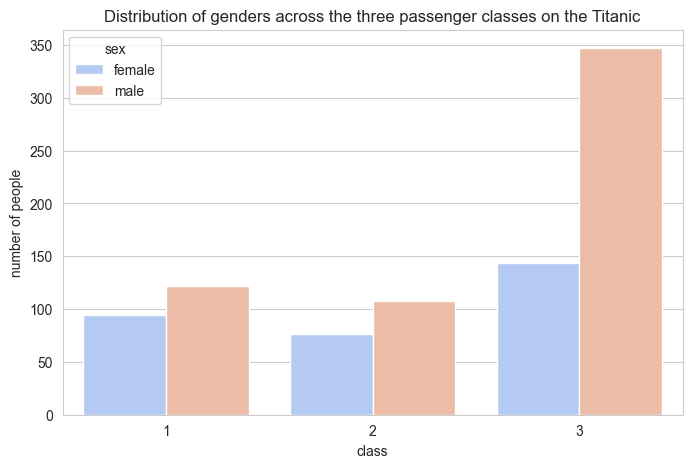

In [200]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x="pclass", hue="sex", palette="coolwarm")
plt.xlabel("class")
plt.ylabel("number of people")
plt.title("Distribution of genders across the three passenger classes on the Titanic")
plt.show()

The following plot analyzes the numbers of survivors according to gender, clearly revealing that more women were rescued than men although most women were in the third class as shown in the plot above.

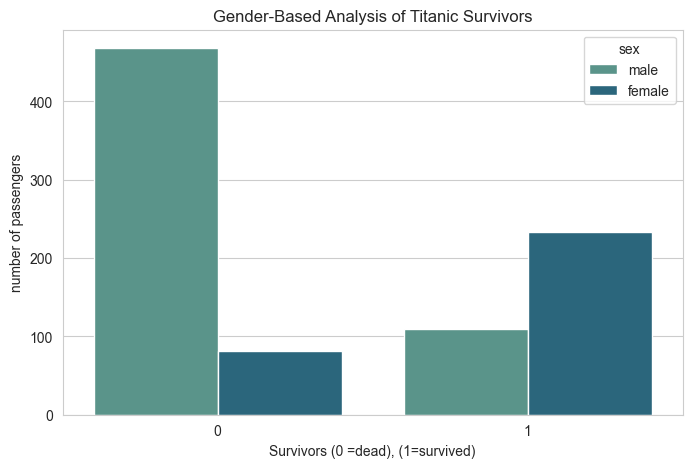

In [201]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
sns.countplot(data=titanic, x = "survived", hue = "sex", palette ="crest")
plt.xlabel("Survivors (0 =dead), (1=survived)")
plt.ylabel("number of passengers")
plt.title("Gender-Based Analysis of Titanic Survivors")
plt.show()

The survival rate can be used instead of the numbers of survivals. For analyzing the survival rate per class, we first group the DF according to the three classes (df.groupby('pclass')) then we choose the column 'survived' only and calculate the mean values (.mean()).
Since the column 'survived' contains only 0 or 1 values the mean value represents the survival rate.

For the plot we use a barplot with the survivor classes on the x-axis (x=survivor_class.index) and the calculated mean values on the y-axis (y = survivor_class.values). The plot is colored according to the classes (hue = survivor_class.index) using the palette 'viridis' which is optimized for users with color blindness.

The plot reveals that passengers from the first class have a higher survival rate compared to the lower classes.

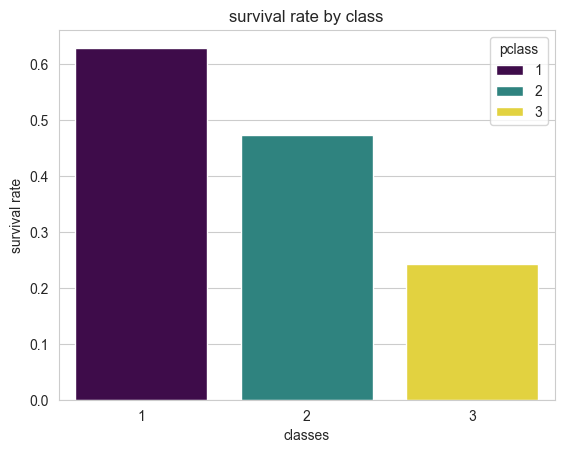

In [202]:
survivor_class = titanic.groupby("pclass")["survived"].mean()

sns.barplot(x=survivor_class.index, y = survivor_class.values, hue = survivor_class.index, palette = "viridis")
plt.xlabel("classes")
plt.ylabel("survival rate")
plt.title("survival rate by class")
plt.show()


Similar to the second plot in this notebook which showed the number of survivals per gender we can also analyze the survival rate per gender. 
Again the plot shows that females had a higher survival rate than men

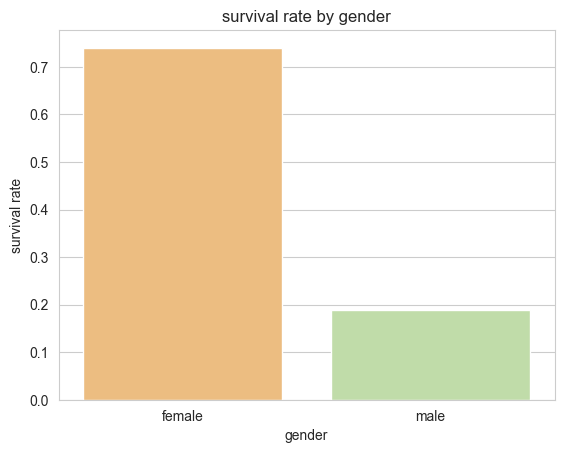

In [203]:
survivor_gender =titanic_filtered_cleaned.groupby('sex')['survived'].mean()
sns.barplot(x=survivor_gender.index, y = survivor_gender.values, hue = survivor_gender.index, palette = "Spectral")
plt.xlabel("gender")
plt.ylabel("survival rate")
plt.title("survival rate by gender")
plt.show()


## Embarkation town analysis

The following plot analyzes the survival rate according to the embarkation port. First we have to check how many people arrived at each port.
The plot clearly shows that the highest number of people embarked at Southhampton.

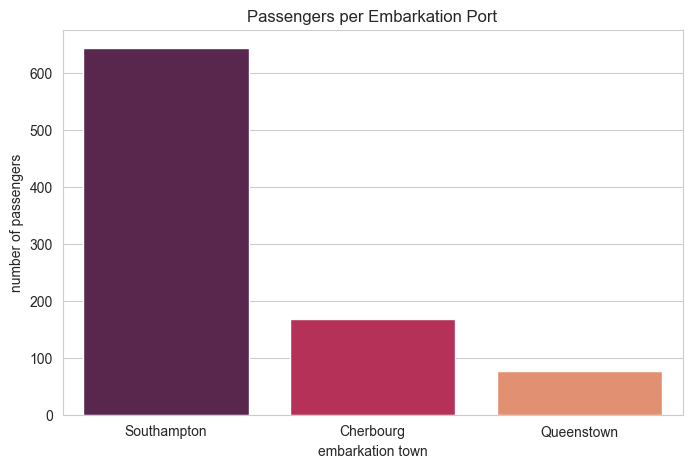

In [204]:
embark_counts = titanic_filtered_cleaned["embark_town"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x= embark_counts.index, y = embark_counts.values, hue = embark_counts.index, legend = False, palette = "rocket")
plt.xlabel("embarkation town")
plt.ylabel("number of passengers")
plt.title("Passengers per Embarkation Port")
plt.show()


Although most people embarked at Southampton, people embaring at Cherbourg have the highest survival rate.
Since females and passengers from the first class have a higher survival rate we then analyze the distribution of gender and classes embarking at the three locations.
The plots below show that most (male) passengers from the third class embarked at Southampton which have the lowest survival rate. Cherbourg has the highest number of females and people from first class in regard to the total number of passengers.

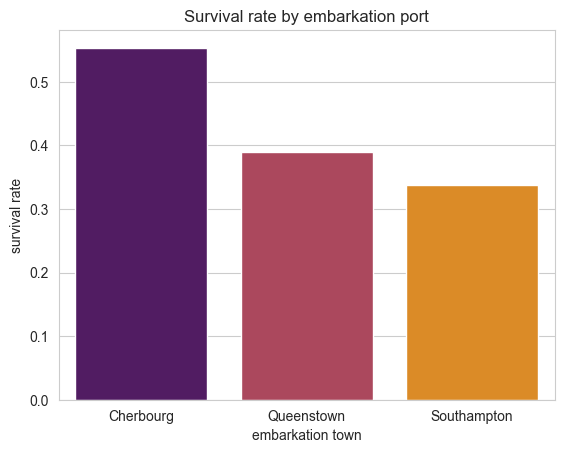

In [205]:
survival_embark_town = titanic_filtered_cleaned.groupby("embark_town")["survived"].mean().reset_index()
sns.barplot(data = survival_embark_town, x="embark_town", y="survived", hue="embark_town" , palette ="inferno")
plt.xlabel("embarkation town")
plt.ylabel("survival rate")
plt.title("Survival rate by embarkation port")
plt.show()


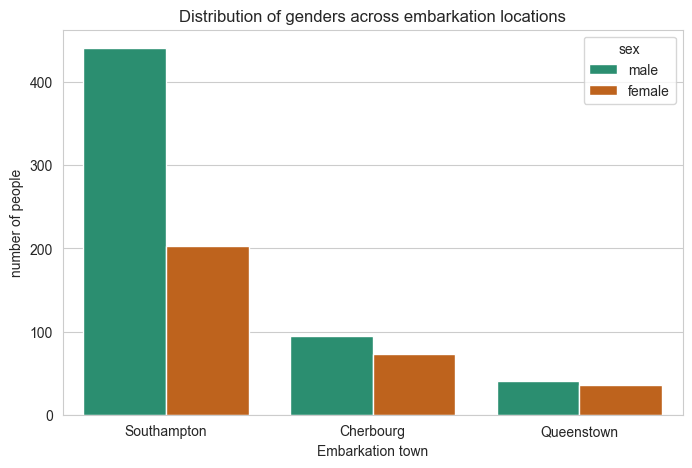

In [206]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x="embark_town", hue="sex", palette="Dark2")
plt.xlabel("Embarkation town")
plt.ylabel("number of people")
plt.title("Distribution of genders across embarkation locations")
plt.show()

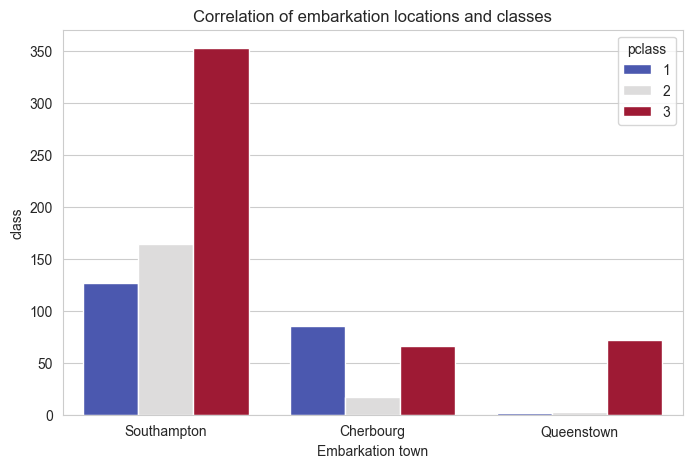

In [207]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x="embark_town", hue="pclass", palette="coolwarm")
plt.xlabel("Embarkation town")
plt.ylabel("class")
plt.title("Correlation of embarkation locations and classes")
plt.show()

# Final conclusion:

The analysis of the Titanic dataset shows that the survival rate is influenced by gender and social class, with females and first-class passengers having a higher likeability to be rescued.